<a href="https://colab.research.google.com/github/dantecomedia/Detecting-Covid-19-/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MOUNTING GOOGLE DRIVE


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!cp "/content/gdrive/My Drive/Covid-19 Dataset/keras-covid-19.zip" "/content/"

In [ ]:
!unzip keras-covid-19.zip -d "/content/dataset"

Archive:  keras-covid-19.zip
   creating: /content/dataset/keras-covid-19/
  inflating: /content/dataset/keras-covid-19/build_covid_dataset.py  
  inflating: /content/dataset/keras-covid-19/covid19.model  
   creating: /content/dataset/keras-covid-19/dataset/
   creating: /content/dataset/keras-covid-19/dataset/covid/
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: /content/dataset/keras-covid-19/datas

In [ ]:
!cp  -r "/content/dataset/keras-covid-19/dataset" "/content/main/"

## Loading Basic Dependencies 

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import sklearn
import imutils 
import os 
import numpy as np
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import  np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Convolution2D,MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the infected and non infected dataset

In [ ]:
covid_infected=os.listdir("/content/main/covid")
normal_lungs=os.listdir("/content/main/normal")
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## Visualizing Covid-19 infected and Healthy Lungs


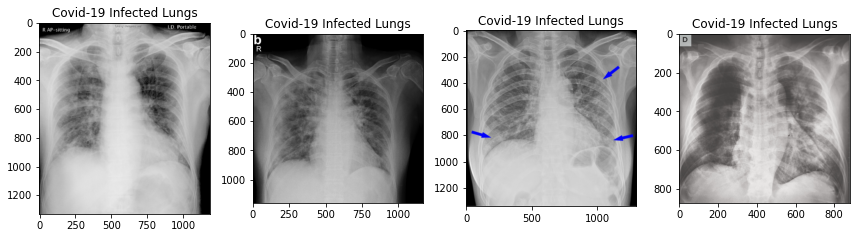

In [ ]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/main/covid' + "/" + covid_infected[i])
    plt.imshow(img)
    plt.title('Covid-19 Infected Lungs')
    plt.tight_layout()
plt.show()

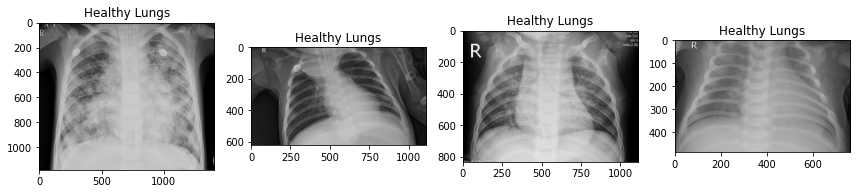

In [ ]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img=cv2.imread('/content/main/normal' + "/" + normal_lungs[i])
    plt.imshow(img)
    plt.title('Healthy Lungs')
    plt.tight_layout()
plt.show()

## Preparing Dataset 
# 0 means Healthy Lungs
# 1 means Covid-19 infected Lungs

In [ ]:
#Preparing the Train and test data
covid=0
normal=0
for i in os.listdir("/content/main/covid"):
    covid=covid+1
for i in os.listdir("/content/main/normal"):
    normal=normal+1
print("Covid-19 infected :",covid)
print("Healthy Lungs :",normal)



Covid-19 infected : 25
Healthy Lungs : 25


In [ ]:
#1 --- have covid-19 infection 
#0 --- is healthy lung

In [ ]:
data=[]
labels=[]
for img in covid_infected:
    try:
        img_read=plt.imread('/content/main/covid' + "/" + img)
        img_resize=cv2.resize(img_read,(224,224))    #RESINGING IMAGE TO 224,224 DIMENSION
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY) #CONVERTING TO GRAY from bgr channel
        img_array=img_to_array(img_gray) # converting to grayscale image to array
        data.append(img_array) # appending it to the list
        labels.append(1)
    except:
        None
for img in normal_lungs:
    try:
        img_read=plt.imread('/content/main/normal' + "/" + img)
        img_resize=cv2.resize(img_read,(224,224))
        img_gray=cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)    
        img_array=img_to_array(img_gray)
        data.append(img_array)
        labels.append(0)
    except:
        None



In [ ]:
data[0].shape

(224, 224, 1)

In [ ]:
image_data=np.array(data)
labels=np.array(labels)

In [ ]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

# SPliting train and test data into 60 : 40 ratio 
#however 70:30 is widely used

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)

# CNN architecture

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)      

In [ ]:
history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

Train on 15 samples, validate on 11 samples
Epoch 1/150
15/15 [==============================] - 8s 517ms/step - loss: 1.3602 - accuracy: 0.4000 - val_loss: 3383.7734 - val_accuracy: 0.1818
Epoch 2/150
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2709.0391 - val_accuracy: 0.1818
Epoch 3/150
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2332.7415 - val_accuracy: 0.1818
Epoch 4/150
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2078.7249 - val_accuracy: 0.1818
Epoch 5/150
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1889.8043 - val_accuracy: 0.1818
Epoch 6/150
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1741.3475 - val_accuracy: 0.1818
Epoch 7/150
15/15 [==============================] - 0s 4ms/step - los

In [ ]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 1ms/step


[26.218259811401367, 0.6363636255264282]

Text(0.5, 1.0, 'Accuracy Curves')

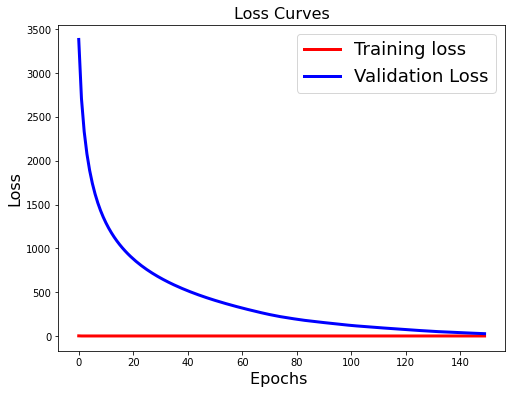

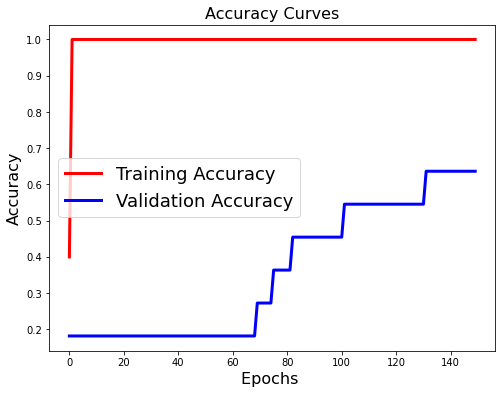

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



In [ ]:
from sklearn.metrics import classification_report,accuracy_score

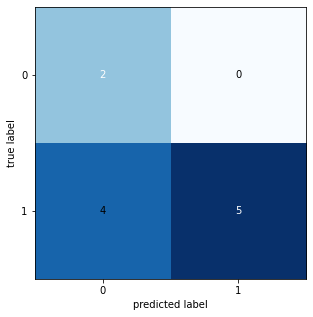

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.6363636363636364
Classification report                precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.56      0.71         9

   micro avg       0.64      0.64      0.64        11
   macro avg       0.67      0.78      0.61        11
weighted avg       0.88      0.64      0.68        11
 samples avg       0.64      0.64      0.64        11



#USING DATA AUGMENTATION 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(X_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(X_test, y_test, batch_size = 64, shuffle = False)


In [ ]:
chanDim=-1
model_aug=Sequential()
model_aug.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(64, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Conv2D(128, (3, 3), activation='relu'))
model_aug.add(MaxPooling2D((2,2), strides=(2,2)))
model_aug.add(BatchNormalization(axis = chanDim))
model_aug.add(Flatten())
model_aug.add(Dense(256,activation='relu'))
model_aug.add(Dense(128, activation="relu"))
model_aug.add(Dense(2, activation='softmax'))
from keras import optimizers
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = 32, epochs = 20, validation_data=(X_test,y_test))


Epoch 1/20
32/32 [==============================] - 4s 117ms/step - loss: 0.1126 - accuracy: 0.9646 - val_loss: 2572.2861 - val_accuracy: 0.8182
Epoch 2/20
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3999.3064 - val_accuracy: 0.8182
Epoch 3/20
32/32 [==============================] - 3s 100ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4984.5664 - val_accuracy: 0.8182
Epoch 4/20
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 6133.1519 - val_accuracy: 0.8182
Epoch 5/20
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7486.7573 - val_accuracy: 0.8182
Epoch 6/20
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9083.2041 - val_accuracy: 0.8182
Epoch 7/20
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_

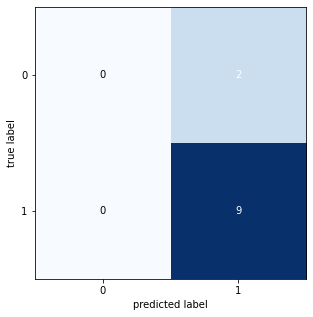

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model_aug.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

Accuracy : 0.8181818181818182
Classification report                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.82      1.00      0.90         9

   micro avg       0.82      0.82      0.82        11
   macro avg       0.41      0.50      0.45        11
weighted avg       0.67      0.82      0.74        11
 samples avg       0.82      0.82      0.82        11



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

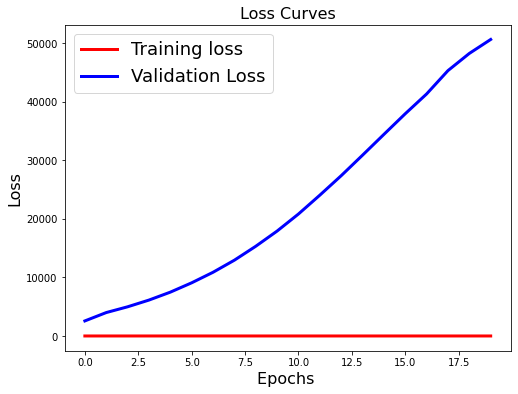

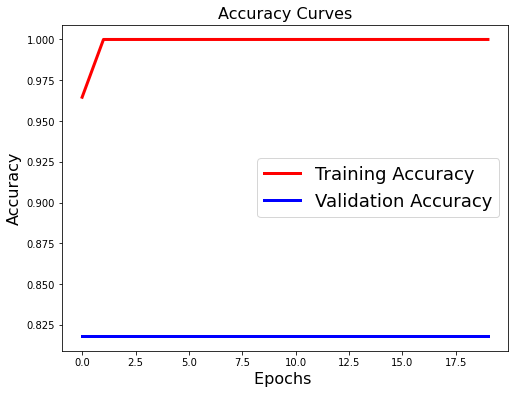

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(h_aug.history['loss'],'r',linewidth=3.0)
plt.plot(h_aug.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(h_aug.history['accuracy'],'r',linewidth=3.0)
plt.plot(h_aug.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



# USING DROPOUT

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 54, 54, 64)       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

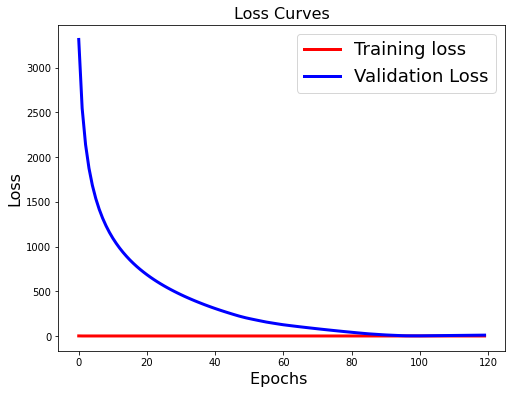

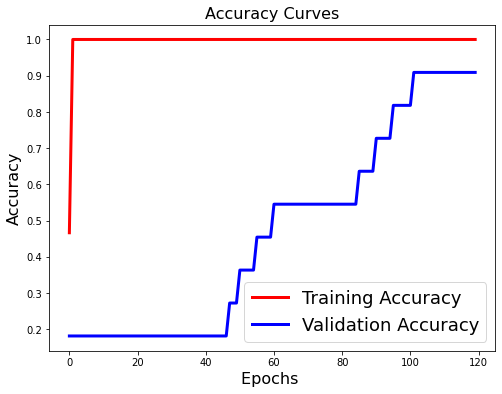

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=120,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



# WITHOUT USING  BATCH NORMALIZATION

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 86528)            

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

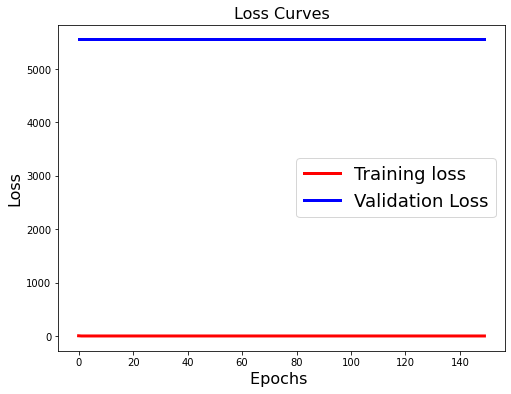

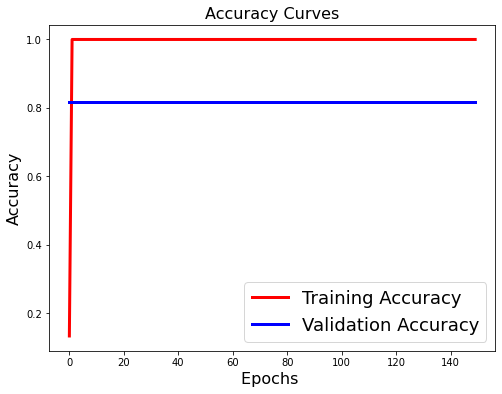

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
#model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=RMSprop(),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



#USING SGD AS OPTIMIZER

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 128)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

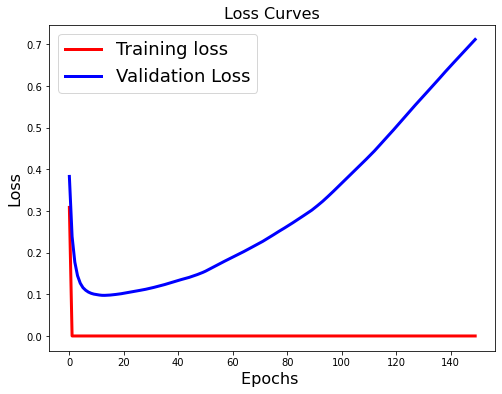

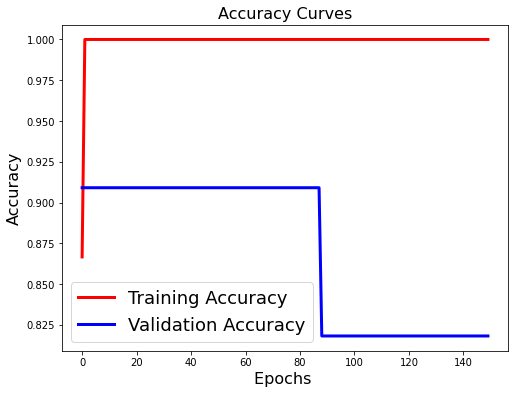

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.0, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



#USING SGD AS OPTIMIZER WITH LEARNING RATE =0.001 AND MOMENTUM = 0.9

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 128)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

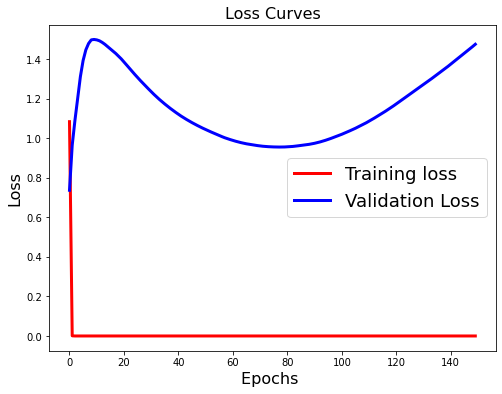

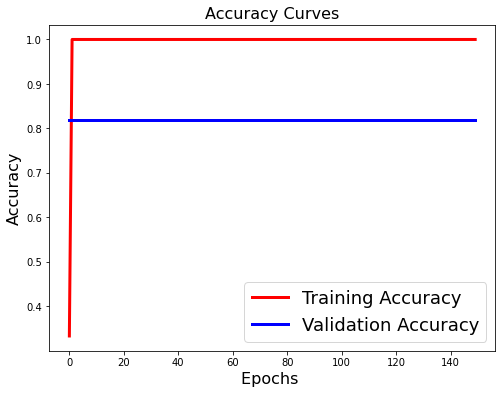

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



# USING SGD WITH 0 MOMENTUM

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 128)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

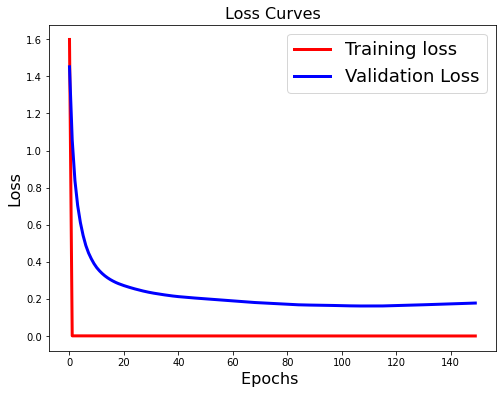

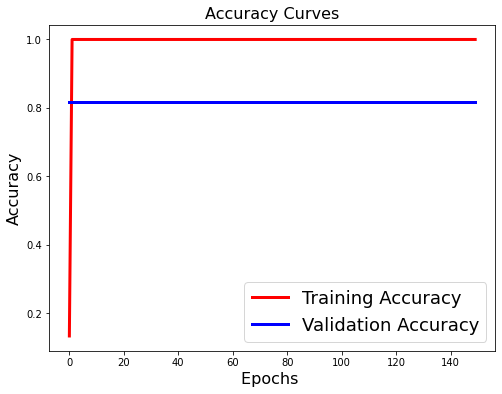

In [ ]:
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.0, nesterov=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



#USING ADAM AS OPTIMIZER WITH 0.01 LEARNING RATE AND BETA1= 0.9 AND BETA2 = 0.999

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 52, 52, 128)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

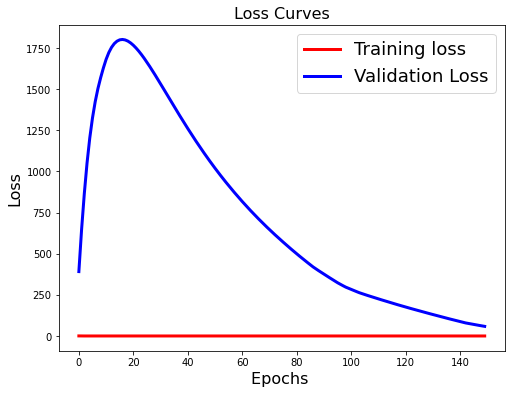

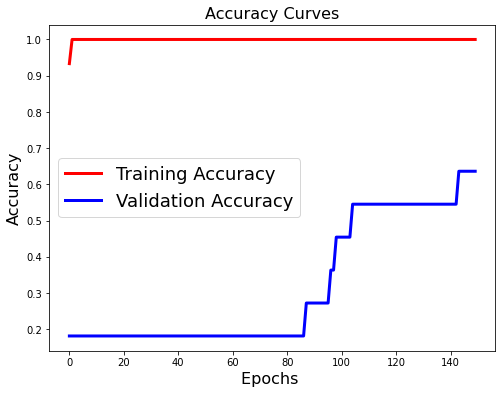

In [ ]:
from keras.optimizers import Adam
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



#USING ADAGRAD AS OPTIMIZER WITH 0.001 LEARNING RATE AND EPSILON = le-07

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 52, 128)      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

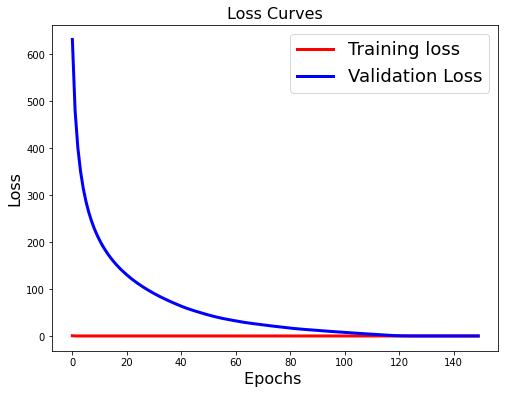

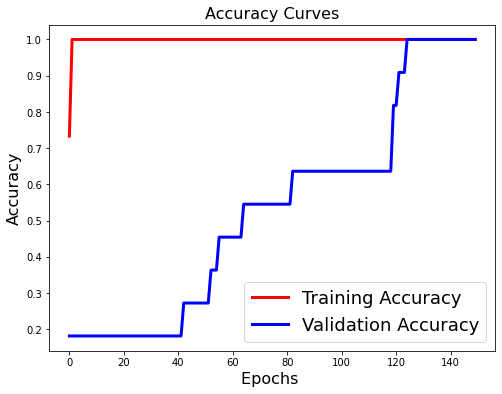

In [ ]:
from keras.optimizers import Adagrad
chanDim=-1
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(224,224,1)))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization(axis = chanDim))
#model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adagrad(learning_rate=0.001,epsilon=1e-07),metrics=['accuracy'], loss="categorical_crossentropy")
model.summary()

history=model.fit(X_train,y_train,epochs=150,batch_size=32, validation_data=(X_test,y_test))

y_pred=model_aug.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)



In [ ]:
image="/content/main/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg"

#Visualizing output from every Hidden layer using vgg16

553467904/553467096 [==============================] - 20s 0us/step


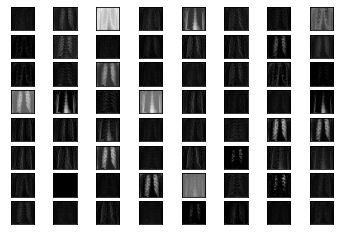

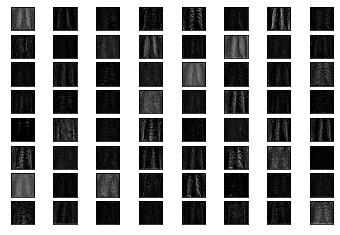

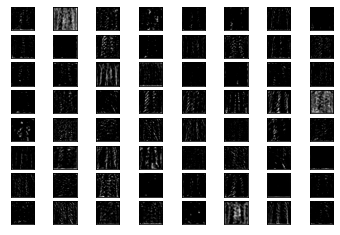

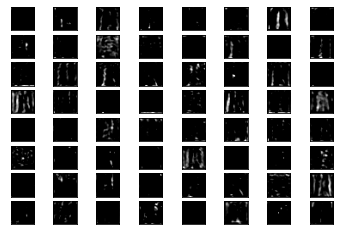

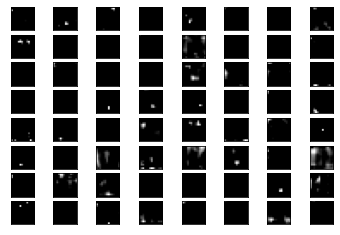

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(image, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	#print("For feature map :", fmap)
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

In [ ]:
normal_lungs="/content/main/normal/IM-0033-0001-0001.jpeg"

--------------------------------------


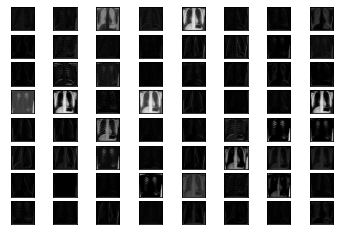

--------------------------------------


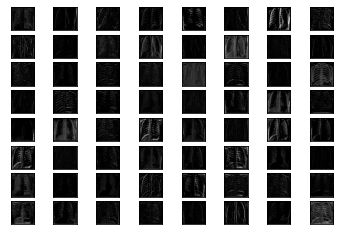

--------------------------------------


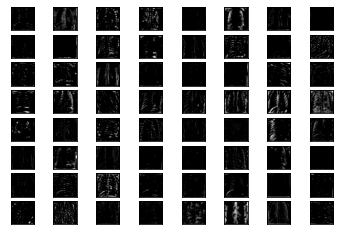

--------------------------------------


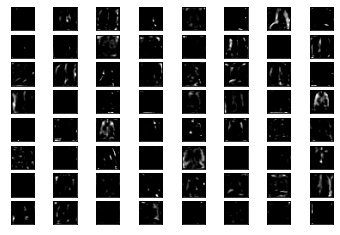

--------------------------------------


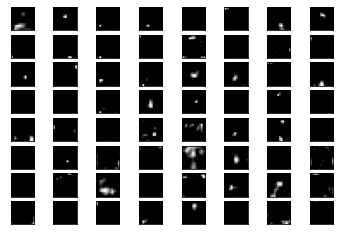

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img(normal_lungs, target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
  print("--------------------------------------")
	# plot all 64 maps in an 8x8 squares
	#print("For feature map :", fmap)
  ix = 1
  for _ in range(square):
    for _ in range(square):
			# specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
			# plot filter channel in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
	# show the figure
  pyplot.show()

# Implementing vgg 16 from scratch 

In [ ]:
data=[]
labels=[]
for img in covid_infected:
    try:
        img_read=plt.imread('/content/main/covid' + "/" + img)
        img_resize=cv2.resize(img_read,(50,50))
        img_ch = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_ch)
        data.append(img_array)
        labels.append(1)
    except:
        None
for img in normal_lungs:
    try:
        img_read=plt.imread('/content/main/normal' + "/" + img)
        img_resize=cv2.resize(img_read,(50,50))
        img_ch = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        img_array=img_to_array(img_ch)
        data.append(img_array)
        labels.append(0)
    except:
        None






In [ ]:
data[0].shape

(50, 50, 1)

In [ ]:
image_data=np.array(data)
labels=np.array(labels)

In [ ]:
idx=np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data=image_data[idx]
labels=labels[idx]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image_data,labels,test_size=0.4, random_state=101)

y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(50,50,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 256)      

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

Train on 15 samples, validate on 11 samples
Epoch 1/20
15/15 [==============================] - 1s 50ms/step - loss: 0.3129 - accuracy: 0.8667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 6.0773 - accuracy: 0.8667 - val_loss: 0.0911 - val_accuracy: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 0.2529 - accuracy: 0.8667 - val_loss: 0.4902 - val_accuracy: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 0.5483 - accuracy: 0.8667 - val_loss: 0.5423 - val_accuracy: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.5865 - accuracy: 0.8667 - val_loss: 0.5445 - val_accuracy: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 0.5876 - accuracy: 0.8667 - val_loss: 0.5351 - val_accuracy: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.8667 - val_loss:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

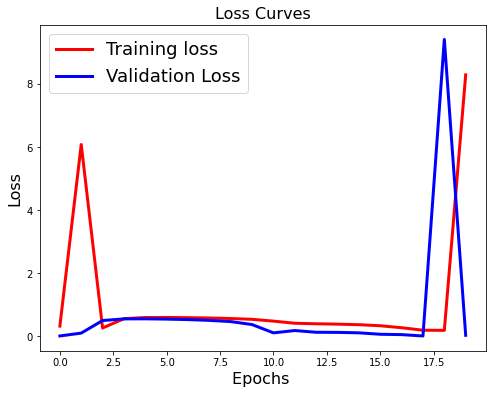

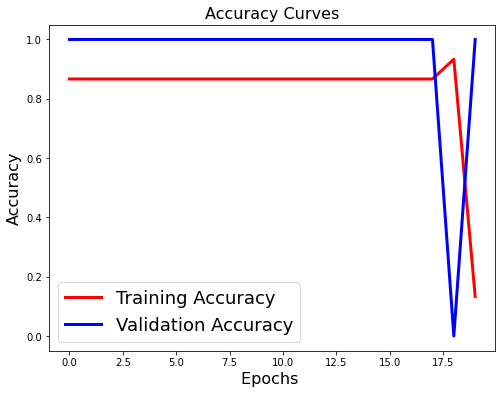

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'], loss="categorical_crossentropy")


history=model.fit(X_train,y_train,epochs=20,batch_size=16, validation_data=(X_test,y_test))

y_pred=model.predict(X_test)
y_pred=(y_pred>0.50)
acc=accuracy_score(y_test,y_pred)
print("Accuracy :", acc)
print("Classification report " , classification_report(y_test,y_pred))

# Loss Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [ ]:
model.save("vgg_model.h5")